In [ ]:
# importing needed libraries
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# reading the data
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)

# creating array from the data
array = dataframe.values
X = array[:,0:8]
y = array[:,8]

In [ ]:
# Check the database we read and the array we created
print(dataframe.head())
print(X.shape)
print(y.shape)

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
(768, 8)
(768,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

start_time = time.time()
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train,y_train)

print(f'Score: {classifier.score(X_test, y_test)}')
print(f'Train time:{time.time()-start_time}')

Score: 0.7597402597402597
Train time:0.0020034313201904297


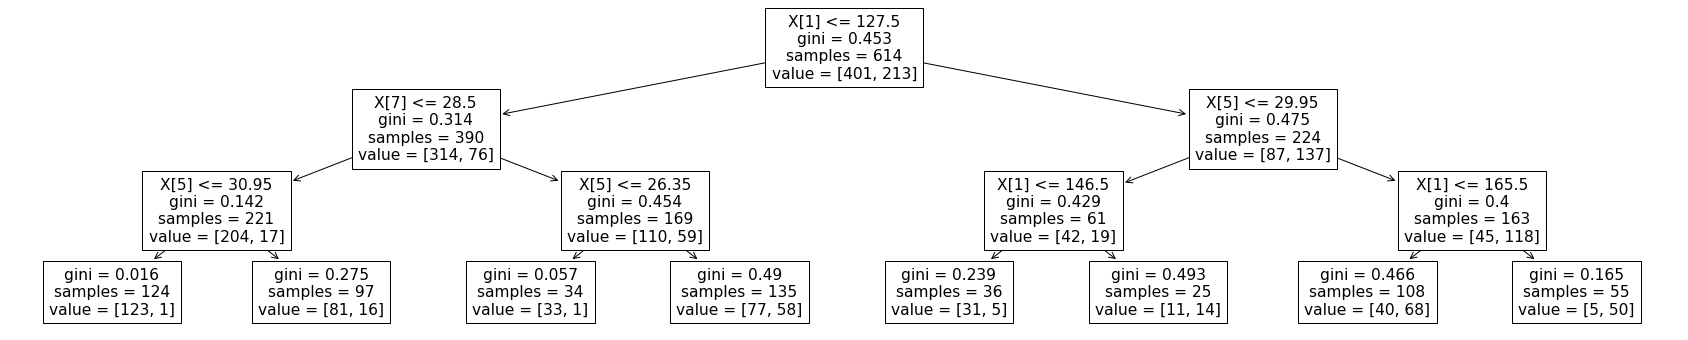

In [ ]:
# Visualize the decision tree

from sklearn import tree
plt.figure(figsize=(30,6))
tree.plot_tree(classifier)
plt.show()

In [ ]:
start_time = time.time()
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3)
classifier.fit(X_train,y_train)

print(f'Score: {classifier.score(X_test, y_test)}')
print(f'Train time:{time.time()-start_time}')

Score: 0.7662337662337663
Train time:0.004999637603759766


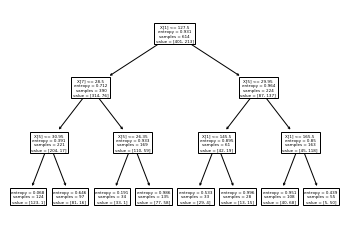

In [ ]:
# Visualize the decision tree
tree.plot_tree(classifier)
plt.show()

In [ ]:
#Random forest

In [ ]:
import numpy as np
import random


start_time = time.time()

forest = []
for i in range(10):
    tre = DecisionTreeClassifier(max_depth = 3)
    y_temp = np.expand_dims(y_train.copy(),axis = -1)
    X_temp = X_train.copy()
    X_temp = np.delete(X_temp, i%X_temp.shape[-1],1)
    
    train_set = np.concatenate((X_temp, y_temp), axis = 1)
    random.shuffle(train_set)
    train_set = train_set[:int(0.9*len(train_set))]
    y_temp = train_set[:,-1:]
    X_temp = train_set[:,:-1]
    
    tre.fit(X_temp, y_temp)
    forest.append(tre)
    

In [ ]:
from sklearn.metrics import accuracy_score

def ForestPredict(x):
    y_preds = []
    for i,tre in enumerate(forest):
        t = x.copy()
        t = np.delete(t, i%t.shape[-1])
        y_preds.append(tre.predict([t])[0])
    
    y_preds = np.array(y_preds, dtype = int)
    counts = np.bincount(y_preds)
    return np.argmax(counts)
        

In [ ]:
y_pred = []
for X in X_test:
    y_pred.append(ForestPredict(X))
y_pred = np.array(y_pred)
accuracy_score(y_test, y_pred)

0.7142857142857143

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [2,10,200]
criterion = ['gini', 'entropy']
max_features =['auto']
max_depth = [5,10,15]
min_samples_split = [2,5,50]
min_samples_leaf = [1,4,20]
bootstrap = [True, False]

random_grid ={
        'n_estimators': n_estimators,
        'criterion': criterion,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split':min_samples_split,
        'bootstrap': bootstrap
    
}

In [ ]:
start_time = time.time()
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, 
                           param_distributions = random_grid,
                           n_iter = 10, 
                           cv = 10, 
                           random_state=42)
rf_random.fit(X_train,y_train)

print(f'Trains time: {time.time()-start_time}')

Trains time: 14.528119564056396


In [ ]:
rf_random.best_score_

0.7800898995240614

In [ ]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'gini',
 'bootstrap': True}

In [ ]:
print(rf_random.best_estimator_.score(X_test,y_test))

0.7467532467532467
